# Question 1 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Product.csv")
df

,ProductID,ProductName,Category,Price,StockQuantity,SupplierID,WarrantyMonths,Rating
0,2001,Product_2001,Accessories,19039.74,256,36,12,3.6
1,2002,Product_2002,Electronics,47560.36,278,3,12,4.9
2,2003,Product_2003,Electronics,36733.70,150,9,6,4.3
3,2004,Product_2004,Accessories,30133.59,283,8,12,2.5
4,2005,Product_2005,Wearables,8222.92,425,33,6,3.4
...,...,...,...,...,...,...,...,...
1045,3046,Product_3046,Smart Devices,30985.23,118,41,6,2.2
1046,3047,Product_3047,Electronics,12031.49,45,1,12,3.3
1047,3048,Product_3048,Accessories,1707.84,241,8,6,2.3
1048,3049,Product_3049,Home Appliances,43569.89,238,23,24,3.8


In [26]:
class LowRatingError(Exception):
    pass
    
    def load_product_details(filename):
        try:
            df = pd.read_csv(filename)
            return df
        except FileNotFoundError:
            print(f"Failed to load the file {filename}")
        finally:
            print("File loaded successfully")
    
product_details = load_product_details("Product.csv")
print(product_details)
        

File loaded successfully
      ProductID   ProductName         Category     Price  StockQuantity  \
0          2001  Product_2001      Accessories  19039.74            256   
1          2002  Product_2002      Electronics  47560.36            278   
2          2003  Product_2003      Electronics  36733.70            150   
3          2004  Product_2004      Accessories  30133.59            283   
4          2005  Product_2005        Wearables   8222.92            425   
...         ...           ...              ...       ...            ...   
1045       3046  Product_3046    Smart Devices  30985.23            118   
1046       3047  Product_3047      Electronics  12031.49             45   
1047       3048  Product_3048      Accessories   1707.84            241   
1048       3049  Product_3049  Home Appliances  43569.89            238   
1049       3050  Product_3050        Wearables   1552.84            362   

      SupplierID  WarrantyMonths  Rating  
0             36              1

In [30]:
def filter_price(df):
    min_price = 2000
    above_2000 = []
    for i in df[["Price"]]:
        if df[["Price"]] != min_price:
            above_2000.append(df[["Price"]])
    return f" Price that are above 2000: {above_2000}"

above_2000 = filter_price("Product.csv")
    

TypeError: string indices must be integers, not 'list'

# Question 2

In [32]:
df = pd.read_csv("Sales.csv")
df

,SaleID,SaleDate,CustomerID,ProductID,QuantitySold,SaleAmount,PaymentMethod,Region
0,5001,2024-07-04,CUST_6438,2179,3,83085.91,Credit Card,South
1,5002,2024-04-22,CUST_5476,2900,1,51306.03,Debit Card,West
2,5003,2024-09-16,CUST_3039,2241,3,62403.89,Net Banking,West
3,5004,2022-02-10,CUST_7029,2486,3,48296.47,Debit Card,South
4,5005,2023-05-21,CUST_8159,2430,4,48337.73,Net Banking,North
...,...,...,...,...,...,...,...,...
1095,6096,2024-08-17,CUST_5877,2700,7,11260.04,Debit Card,Central
1096,6097,2022-01-27,CUST_1528,2728,9,70538.13,UPI,South
1097,6098,2022-08-09,CUST_8368,2598,5,30646.31,Net Banking,West
1098,6099,2023-01-02,CUST_5305,2766,2,27616.83,Credit Card,Central


In [51]:
#Extract unique PaymentMethod values and convert to immutable tuple
unique_pay_method = df[["PaymentMethod"]]
print(unique_pay_method)

     PaymentMethod
0      Credit Card
1       Debit Card
2      Net Banking
3       Debit Card
4      Net Banking
...            ...
1095    Debit Card
1096           UPI
1097   Net Banking
1098   Credit Card
1099   Credit Card

[1100 rows x 1 columns]


In [59]:
#Use dictionary comprehension to count total transactions per Region
payment_method_totals = df.groupby("Region")["PaymentMethod"].count()
payment_method_totals
convertion = dict(payment_method_totals)
convertion

{'Central': np.int64(245),
 'East': np.int64(210),
 'North': np.int64(210),
 'South': np.int64(220),
 'West': np.int64(215)}

# Question 3

In [99]:
df = pd.read_csv("SalesChurn.csv")
df


,CustomerID,LastPurchaseDate,InactiveDays,ChurnProbability,CustomerValue,PurchaseFrequency,ChurnStatus
0,CUST_8373,2023-12-17,60,0.18,48088.43,5,Churned
1,CUST_7303,2020-12-02,261,0.89,30332.16,9,Churned
2,CUST_6821,2022-10-03,311,0.44,28194.03,46,Churned
3,CUST_4698,2022-06-01,58,0.14,1219.44,40,At Risk
4,CUST_4044,2020-10-02,224,0.76,4507.01,14,Churned
...,...,...,...,...,...,...,...
1015,CUST_8531,2023-09-14,161,0.82,24777.10,20,Active
1016,CUST_1589,2022-11-30,66,0.89,2334.07,48,Churned
1017,CUST_1538,2021-08-28,161,0.52,26995.01,48,Active
1018,CUST_3897,2022-05-08,106,0.57,35387.38,48,Active


In [100]:
class InvalidProbabilityError(Exception):
    pass


In [101]:
def risk_category(df,probability: float) -> str:

    if probability < 0 or probability > 1:
        raise InvalidProbabilityError(f"Invalid probability value: {probability}")
    
    if probability > 0.8:
        return "Critical"
    elif 0.5 <= probability <= 0.8:
        return "High"
    else:  
        return "Low"


In [84]:
# List Comprehension
try:
    risk_labels = [risk_category(p) for p in df["ChurnProbability"]]
    print("First 10 risk labels:", risk_labels[:10])
except InvalidProbabilityError as error:
    print("Error while computing risk categories:", error)


First 10 risk labels: ['Low', 'Critical', 'Low', 'Low', 'High', 'High', 'High', 'Critical', 'High', 'Critical']


In [85]:
try:
    risk_labels = [risk_category(p) for p in df["ChurnProbability"]]
    freq_dict = Counter(risk_labels)
    print("Frequency dictionary:", freq_dict)
except InvalidProbabilityError as error:
    print("Error while computing frequencies:", error)


Frequency dictionary: Counter({'Low': 482, 'High': 321, 'Critical': 217})


# Question 4

In [87]:
import numpy as np

In [121]:
# 1. Extract Price and StockQuantity columns from Product.csv as NumPy arrays
df = pd.read_csv("Product.csv")
print(df)
numpy =df.to_numpy()
print(numpy)
# statistical measures
avg_price = df[["Price"]].mean()
print(f"Average price of price : {avg_price}")
print("-" * 30)
avg_stock_quality = df[["StockQuantity"]].mean()
print(f"Average stockquantity : {avg_stock_quality}")
print("-" * 30)
median_price = df[["Price"]].median()
print(f"Median price  : {avg_price}")
print("-" * 30)
median_stock_quality = df[["StockQuantity"]].median()
print(f"Median stockquantity : {avg_stock_quality}")
print("-" * 30)
std_price = df[["Price"]].std()
print(f"Standard price : {avg_price}")
print("-" * 30)
avg_stock_quality = df[["StockQuantity"]].std()
print(f"Standard stockquantity : {avg_stock_quality}")
print("-" * 30)
percentile_price = df[["Price"]].quantile(0.25)
print(f"percentile price : {avg_price}")
print("-" * 30)

percentile_price = df[["Price"]].quantile(0.50)
print(f"percentile price : {avg_price}")
print("-" * 30)

percentile_price = df[["Price"]].count().quantile(0.75)
print(f"percentile price : {avg_price}")
print("-" * 30)








      ProductID   ProductName         Category     Price  StockQuantity  \
0          2001  Product_2001      Accessories  19039.74            256   
1          2002  Product_2002      Electronics  47560.36            278   
2          2003  Product_2003      Electronics  36733.70            150   
3          2004  Product_2004      Accessories  30133.59            283   
4          2005  Product_2005        Wearables   8222.92            425   
...         ...           ...              ...       ...            ...   
1045       3046  Product_3046    Smart Devices  30985.23            118   
1046       3047  Product_3047      Electronics  12031.49             45   
1047       3048  Product_3048      Accessories   1707.84            241   
1048       3049  Product_3049  Home Appliances  43569.89            238   
1049       3050  Product_3050        Wearables   1552.84            362   

      SupplierID  WarrantyMonths  Rating  
0             36              12     3.6  
1            

# Question 5

In [122]:
class InvalidAmountError (Exception):
    pass
    

In [124]:
class Transaction():
    def __init__(self,sales_id,amount,date):
        self.__sale_id = sales_id
        self.__amount = amount
        self.__data = date
    def validate_amount():
        if amount != isdigit():
            raise InvalidAmountError("Please enter a valid amount")
    def calculat_tax(rate):
        return amount 
    @property
    def get_sales(id):
        return sales_id
    def set_sales():
        sales_id = id
        print(sales_id)
           

In [127]:
class ProductTransaction(Transaction):
    def __init__(self,product_id,quantity):
        super().__init__(self,sales_id,amount,date)

SyntaxError: invalid syntax (4007984370.py, line 3)

# Question 6 

In [128]:
sales_df = pd.read_csv("Sales.csv")
product_df = pd.read_csv("Product.csv")
sales_churn_df = pd.read_csv("SalesChurn.csv")
print(sales_df)
print(product_df)
print(sales_churn_df)

      SaleID    SaleDate CustomerID  ProductID  QuantitySold  SaleAmount  \
0       5001  2024-07-04  CUST_6438       2179             3    83085.91   
1       5002  2024-04-22  CUST_5476       2900             1    51306.03   
2       5003  2024-09-16  CUST_3039       2241             3    62403.89   
3       5004  2022-02-10  CUST_7029       2486             3    48296.47   
4       5005  2023-05-21  CUST_8159       2430             4    48337.73   
...      ...         ...        ...        ...           ...         ...   
1095    6096  2024-08-17  CUST_5877       2700             7    11260.04   
1096    6097  2022-01-27  CUST_1528       2728             9    70538.13   
1097    6098  2022-08-09  CUST_8368       2598             5    30646.31   
1098    6099  2023-01-02  CUST_5305       2766             2    27616.83   
1099    6100  2021-04-08  CUST_6711       2218             7    99799.77   

     PaymentMethod   Region  
0      Credit Card    South  
1       Debit Card     West

In [155]:
# Merge opeeration :
merged = df.merged(sales_df,product_df ,on = "ProductID")
print(merged)

AttributeError: 'DataFrame' object has no attribute 'merged'

# Question 7

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df = pd.read_csv("Product.csv")
print(df)

      ProductID   ProductName         Category     Price  StockQuantity  \
0          2001  Product_2001      Accessories  19039.74            256   
1          2002  Product_2002      Electronics  47560.36            278   
2          2003  Product_2003      Electronics  36733.70            150   
3          2004  Product_2004      Accessories  30133.59            283   
4          2005  Product_2005        Wearables   8222.92            425   
...         ...           ...              ...       ...            ...   
1045       3046  Product_3046    Smart Devices  30985.23            118   
1046       3047  Product_3047      Electronics  12031.49             45   
1047       3048  Product_3048      Accessories   1707.84            241   
1048       3049  Product_3049  Home Appliances  43569.89            238   
1049       3050  Product_3050        Wearables   1552.84            362   

      SupplierID  WarrantyMonths  Rating  
0             36              12     3.6  
1            

C:\Users\maran\AppData\Local\Temp\ipykernel_11976\2334506498.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


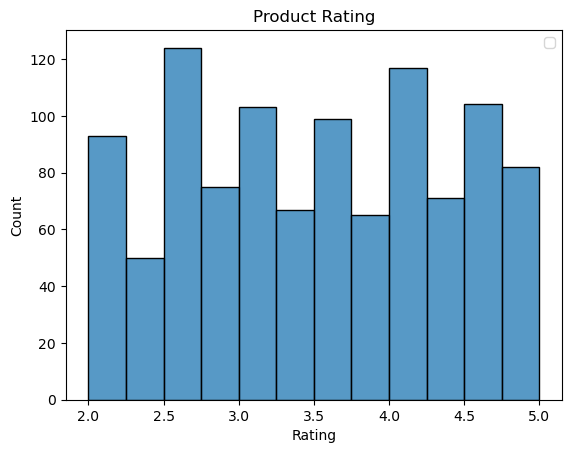

C:\Users\maran\AppData\Local\Temp\ipykernel_11976\2334506498.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


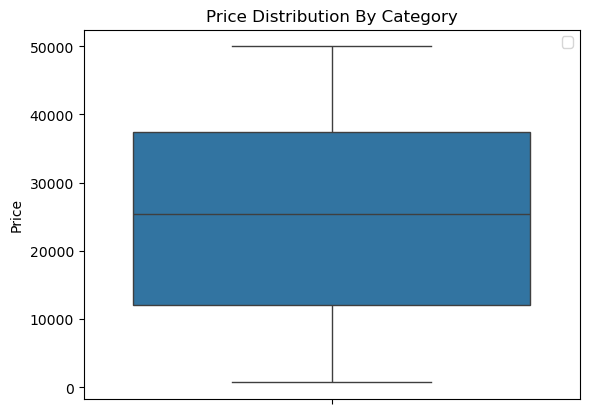

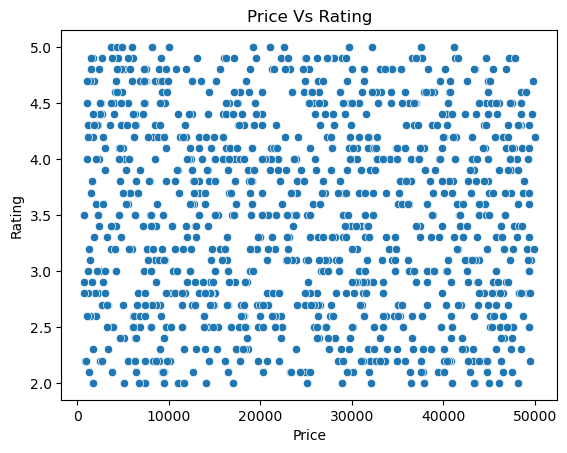

In [154]:
sns.histplot(df["Rating"])
plt.title("Product Rating")
plt.legend()
plt.show()
sns.boxplot(df["Price"])
plt.title("Price Distribution By Category")
plt.legend()
plt.show()
sns.scatterplot(x = df["Price"], y = df["Rating"])
plt.title("Price Vs Rating")
plt.show()
